In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from qs import QS

from animation import animate

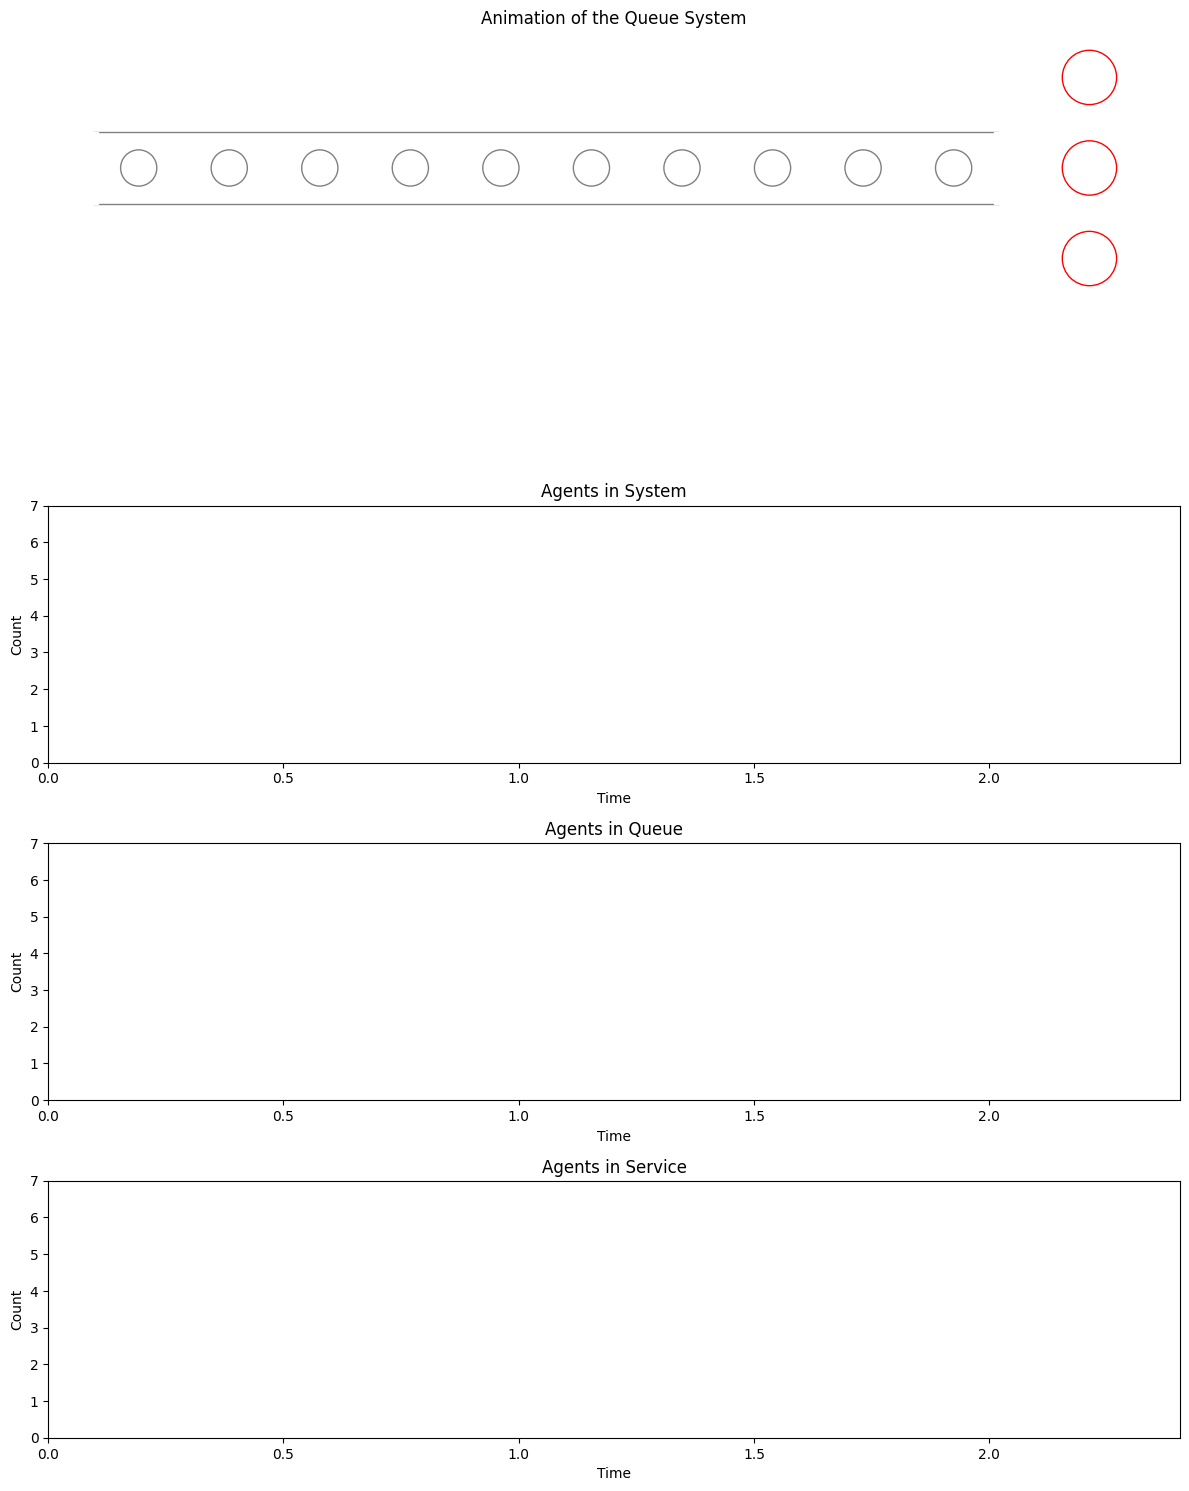

In [4]:
rng = np.random.default_rng(seed=42)

srv_nb = 2

tags_mean_dist = 0.1 # mean distance between incoming tags, in seconds
lambda_a = 1. / tags_mean_dist

test_mean_dist = 1 # mean treatment time for a tag, in seconds (duration of the testsuite)
mu_t = 1. / test_mean_dist
lambda_t = mu_t * srv_nb

arval_dist = lambda size : rng.exponential(1./lambda_a, size=size)
srv_dist = lambda : rng.exponential(1./lambda_t)
queue_size = 10

mm1 = QS(arval_dist, srv_dist, srv_nb, queue_size=queue_size, test_size=20)

mm1.pretreat()

mm1.run()

mm1.posttreat()

animate(mm1, save=True, fps=7)

